In [45]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import os 
import plotly.express as px

In [46]:
#!pip install -U kaleido

In [47]:
lstPath = glob.glob("areasIncidencia/*.csv")

## set parametros  iniciais

In [48]:
lstnameImgCorre = [
    "mapa_estable", 
    "mapa_incidencias",
]
mapaAnalise = 0
saveCSV = False

In [49]:
dict_color_incid = {
            '1': '#faf3dd',
            '2': '#c8d5b9',
            '3': '#f19c79',
            '4': '#fec601',
            '5': '#013a63'
        }
# dict_CColor_incid = {
#             '<b> Sem mudanças CC</b>': '#faf3dd',
#             '<b> Alguma mudança CC</b>': '#c8d5b9',
#             '<b> Total Diferença </b>': '#f19c79'
#         }
dict_CColor_incid = {
            '<b> Sem mudanças CC</b>': '#C8C8C8',
            '<b> Alguma mudança CC</b>': '#FED266',
            '<b> Total Diferença </b>': '#FBA713'
        }
dict_color_concord = {
            '1': '#C8C8C8',
            '2': '#FED266',
            '3': '#FBA713',
            '4': '#cb701b',
            '5': '#a95512',
            '6': '#662000',
            '7': '#cb181d'
        }
# dict_CColor_concord = {
#             '<b> Concordante </b>': '#C8C8C8',
#             '<b> Concordante recente </b>': '#FED266',
#             '<b> Discordante recente </b>': '#FBA713',
#             '<b> Discordante </b>': '#cb701b',
#             '<b> Muito discordante </b>': '#a95512',
#             '6': '#662000',
#             '7': '#cb181d'
#         }
dict_CColor_concord = {
            '<b> Concordante </b>': '#faf3dd',
            '<b> Concordante recente </b>': '#c8d5b9',
            '<b> Discordante recente </b>': '#f19c79',
            '<b> Discordante </b>': '#fec601',
            '<b> Muito discordante </b>': '#013a63',
        }
dict_color_state = {
            '1': '#C8C8C8',
            '2': '#AE78B2',
            '3': '#772D8F',
            '4': '#4C226A',
            '5': '#22053A'
        }
dict_nameIncid = {
            '0': '<b> Sem mudanças CC</b>',
            '1': '<b> Alguma mudança CC</b>',
            '2': '<b> Total Diferença </b>',
            '3': '<b> Total Diferença </b>'
}
dict_name_Concorda = {
            "1" : "<b> Concordante </b>",
            "2" : "<b> Concordante recente </b>",
            "3" : "<b> Discordante recente </b>",
            "4" : "<b> Discordante </b>",
            "5" : "<b> Muito discordante </b>"
        }

## funções de PLOTs

In [50]:
def plot_pie_areasEstaveis(df_tmp, titlePlot, dict_color, nameLegend):
    fig = px.pie(
        df_tmp, 
        values='area', 
        names='classe',
        hover_data=['name_class'],
        hole= 0.6,
        color='classe',
        color_discrete_map= dict_color
    )
    fig.update_traces(
        textposition='outside', # "inside"
        #textposition='inside',
        textinfo='label + percent',
        textfont_size= 16,
        marker=dict(line=dict(color='#000000', width=0.5))
    )
    fig.update_layout(
        # title= dict(
        #         text= titlePlot, 
        #         font=dict(size=20), 
        #         automargin=True, 
        #         yref='paper'),
        width = 600,
        height = 600,
        showlegend= False,
        # legend_title=nameLegend,
        # legend_title_font_size=15
    )
    fig.show()
    titlePlot = titlePlot.replace(" ", "_")
    print("save as ", titlePlot)
    fig.write_image("imagePPT/" + titlePlot + '.png')

## Fazer graficos de pizza para anos especificos no loop

MAPA ===> mapa_estable <==========
loading YEAR => 1986
número de DataFrame agregados  42
temos (210, 3) filas 
agrupando por classe temos  (5, 2)
  classe          area
0      1  6.492992e+07
1      2  8.326543e+06
2      3  6.106207e+06


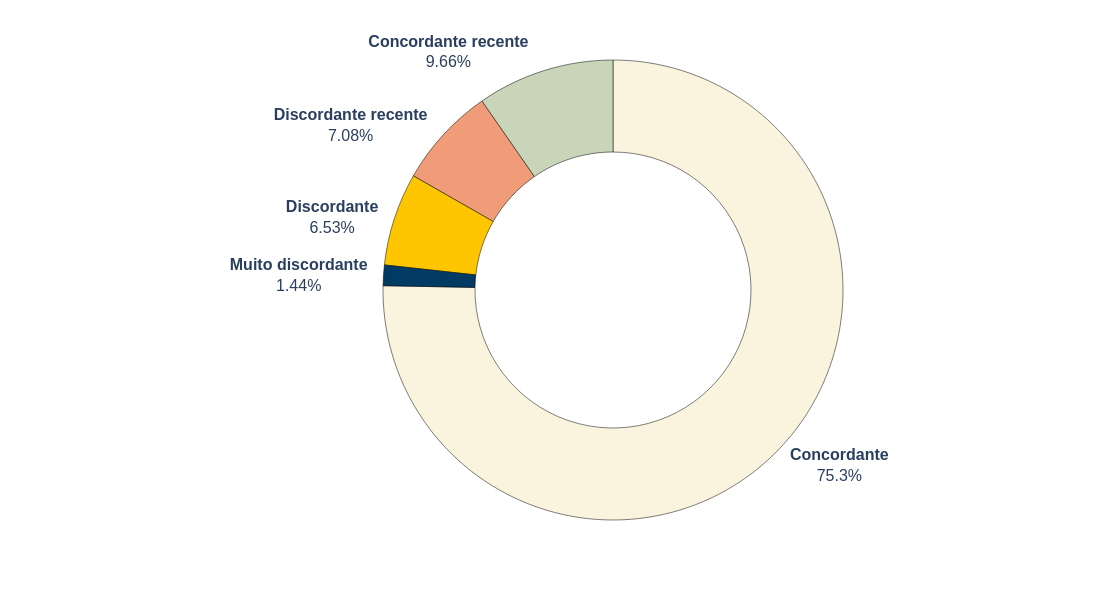

save as  Porcentagem_de_áreas_estaveis,_mapa_1986
loading YEAR => 2018
número de DataFrame agregados  42
temos (208, 3) filas 
agrupando por classe temos  (5, 2)
  classe          area
0      1  6.740409e+07
1      2  6.521222e+06
2      3  6.275635e+06


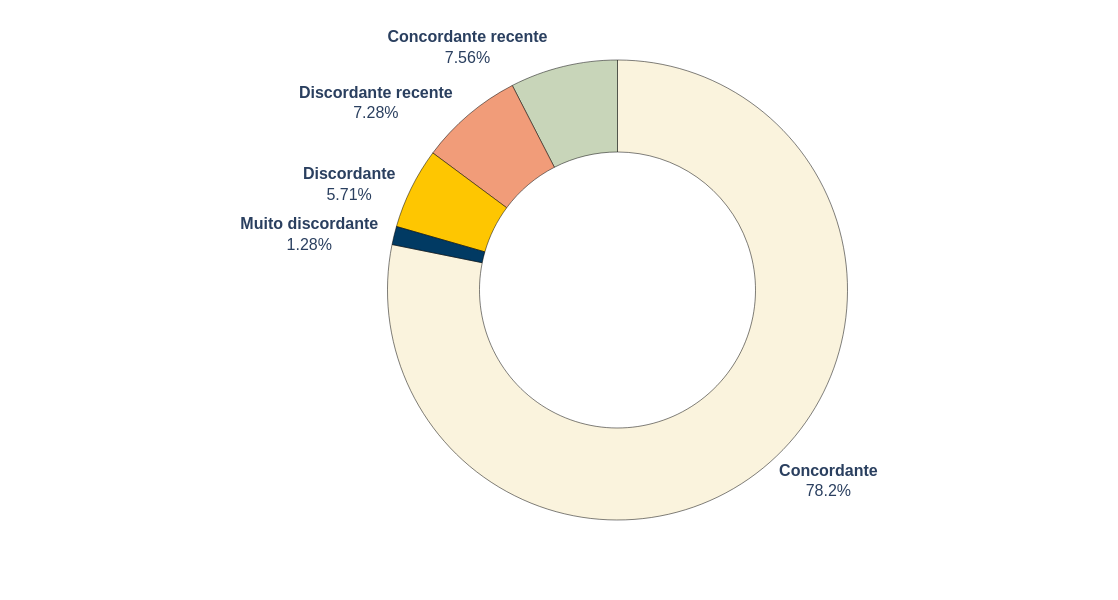

save as  Porcentagem_de_áreas_estaveis,_mapa_2018
MAPA ===> mapa_incidencias <==========
loading YEAR => 1986
número de DataFrame agregados  42
temos (126, 3) filas 
agrupando por classe temos  (3, 2)
  classe          area
0      0  6.492992e+07
1      1  1.443306e+07
2      2  6.867676e+06


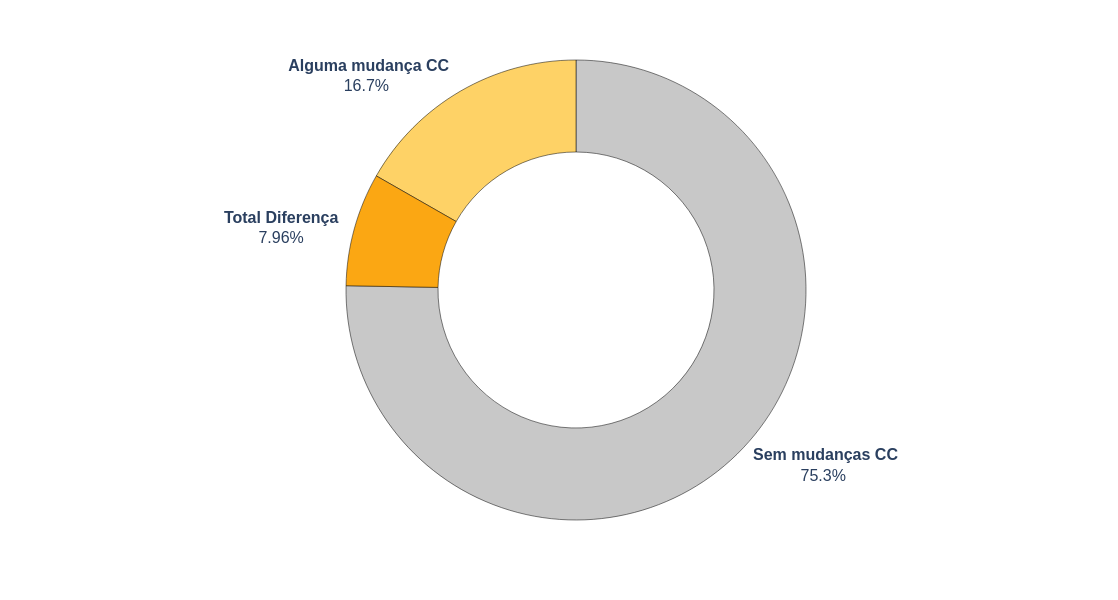

save as  Porcentagem_de_áreas_de_Incidencias,_mapa_1986
loading YEAR => 2018
número de DataFrame agregados  42
temos (126, 3) filas 
agrupando por classe temos  (3, 2)
  classe          area
0      0  6.740409e+07
1      1  1.279721e+07
2      2  6.028837e+06


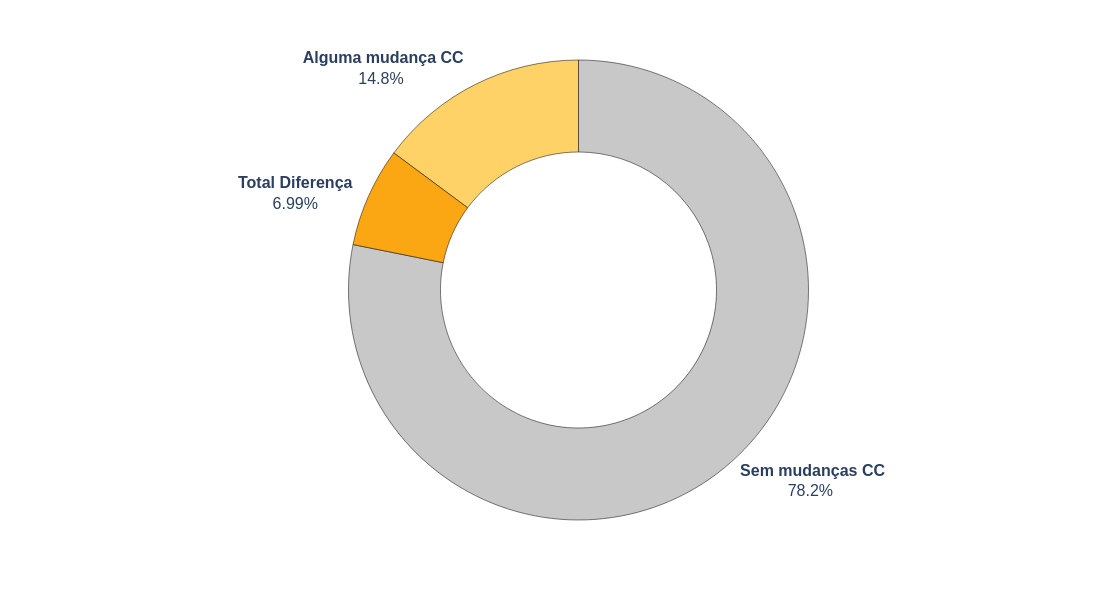

save as  Porcentagem_de_áreas_de_Incidencias,_mapa_2018


In [51]:
for mapaAnalise in lstnameImgCorre:
    print("MAPA ===> " + mapaAnalise + " <==========")
    for year in ['1986', '2018']:
        mapaEnAnalise = mapaAnalise + year        
        cc = 1
        lstDF = []
        print("loading YEAR => " + year)
        for npath in lstPath:
            if mapaEnAnalise in npath:
                # print("#", cc,  "  path >> ", npath)
                cc += 1
                df_tmp = pd.read_csv(npath)
                df_tmp = df_tmp.drop(['system:index','.geo', 'bacia'], axis=1)
                # print("columnas dfTable" , df_tmp.columns)
                #print(df_tmp.head())
                lstDF.append(df_tmp)
                #os.remove(npath)
        
        print("número de DataFrame agregados ", len(lstDF))
        concat_df  = pd.concat(lstDF, axis=0, ignore_index=True)
        print("temos {} filas ".format(concat_df.shape))          
        dfGroup = concat_df.groupby(['classe'])['area'].sum().reset_index()
        print("agrupando por classe temos " , dfGroup.shape)        
        dfGroup['classe'] = dfGroup['classe'].astype(str)
        
        print(dfGroup.head(3))
        if saveCSV:
            nameExp = "areas_est_Inc" + mapaEnAnalise+ ".csv"
            dfGroup.to_csv("group_table/" + nameExp)       
        
        if "estable" in mapaEnAnalise:
            nomeLegend = "Pixels Estaveis"
            namePlot = "Porcentagem de áreas estaveis, mapa " + year
            dfGroup['name_class'] = dfGroup['classe'].replace(dict_name_Concorda, inplace=True)
            plot_pie_areasEstaveis(dfGroup, namePlot, dict_CColor_concord, nomeLegend)
        elif "incidencias" in mapaEnAnalise:
            nomeLegend = "Pixels Incidencias"
            namePlot = "Porcentagem de áreas de Incidencias, mapa " + year
            dfGroup['name_class'] = dfGroup['classe'].replace(dict_nameIncid, inplace=True)
            plot_pie_areasEstaveis(dfGroup, namePlot, dict_CColor_incid, nomeLegend)
        elif "state" in mapaEnAnalise:
            nomeLegend = "Pixels State"
            namePlot = "Porcentagem de áreas de estado mapa " + year
            plot_pie_areasEstaveis(dfGroup, namePlot, dict_color_state, nomeLegend)

        

## Analises com a Serie historica 

In [52]:
lstDF = []
cc = 1
for npath in lstPath:
    mapaAnalise = npath.replace('area/','')
    mapaAnalise = npath.replace('.csv','')
    if "mapa_estable" in mapaAnalise or "mapa_incidencias" in mapaAnalise:
        year = mapaAnalise[-4:]
        if cc == 1:
            print("#", cc,  "  path >> ", npath)
        cc += 1
        df_tmp = pd.read_csv(npath)
        df_tmp = df_tmp.drop(['system:index','.geo'], axis=1) # 'bacia'
        df_tmp['year'] = [year] * df_tmp.shape[0]
        if "mapa_estable" in mapaAnalise: 
            df_tmp['mapa'] = ['estable'] * df_tmp.shape[0]
        else:
            df_tmp['mapa'] = ['incidencias'] * df_tmp.shape[0]
        #print("columnas dfTable" , df_tmp.columns)
        #print(df_tmp.head())
        lstDF.append(df_tmp)
        #os.remove(npath)
concat_df  = pd.concat(lstDF, axis=0, ignore_index=True)
print("temos {} filas ".format(concat_df.shape))
dfGroup = concat_df.groupby(['mapa', 'year','classe'])['area'].sum().reset_index()
print("agrupando por classe temos " , dfGroup.shape)
dfGroup['classe'] = dfGroup['classe'].astype(str)
dfGroup.head(5)

# 1   path >>  areasIncidencia/areaXclasse_741_mapa_estable2008.csv
temos (11938, 5) filas 
agrupando por classe temos  (285, 4)


,mapa,year,classe,area
0,estable,1985,1,6.444627e+07
1,estable,1985,2,8.727275e+06
2,estable,1985,3,6.008469e+06
3,estable,1985,4,5.726069e+06
4,estable,1985,5,1.322350e+06


In [53]:
df_est = dfGroup[dfGroup['mapa'] == 'estable']
df_est.shape

(180, 4)

In [54]:
df_inc = dfGroup[dfGroup['mapa'] == 'incidencias']
df_inc.shape

(105, 4)

In [55]:
df_inc.classe.value_counts()

classe
0    35
1    35
2    35
Name: count, dtype: int64

In [56]:
df_est.classe.value_counts()

classe
1    36
2    36
3    36
4    36
5    36
Name: count, dtype: int64

In [42]:
df_inc.head()

,mapa,year,classe,area
180,incidencias,1985,0,6.444627e+07
181,incidencias,1985,1,1.473617e+07
182,incidencias,1985,2,7.048419e+06
183,incidencias,1986,0,6.492992e+07
184,incidencias,1986,1,1.443306e+07


In [66]:
def plot_Serie_areasEstaveis(df_tmp, titlePlot, dict_color, nameLegend):
    figBar = px.bar(
        df_tmp, 
        x='year', y
        ='area',
        color='name_class', 
        color_discrete_map= dict_color,
        barmode='stack'
    )
    figBar.update_layout(
        # title= dict(
        #         text= titlePlot, 
        #         font=dict(size=20), 
        #         #automargin=True, 
        #         yref='paper',
        #         x= 0.02, xanchor="left",
        #         y= 1.0, yanchor="bottom", 
        # ),
        width = 1100,
        height = 400,
        legend_title=nameLegend,
        legend_title_font_size=15,
        yaxis=dict(
            title='Área em hectare (milhões)',
            titlefont_size=16,
            tickfont_size=14,
        ),
        xaxis=dict(
            title='Anos da serie historica',
            titlefont_size=16,
            tickfont_size=14,
        ),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.4,
            xanchor="right",
            x=0.9
        )
    )
    figBar.show()
    titlePlot = titlePlot.replace(" ", "_")
    print("save as ", titlePlot)
    figBar.write_image("imagePPT/" + titlePlot + '.png')

/tmp/ipykernel_37548/2354526545.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_37548/2354526545.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



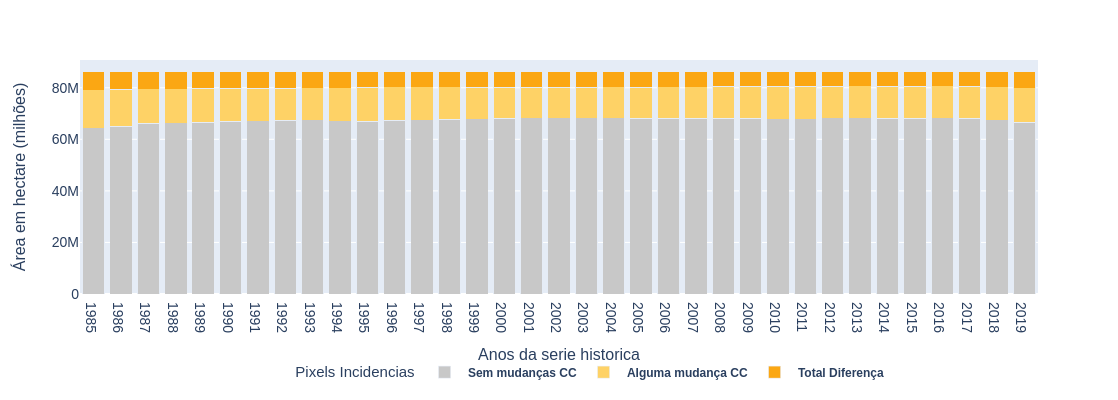

save as  Serie_temporal_de_áreas_Incidencias,_mapa_


In [64]:
nomeLegend = "Pixels Incidencias"
namePlot = "Serie temporal de áreas Incidencias, mapa "
df_inc
df_inc['name_class'] = df_inc['classe'].copy()
df_inc['name_class'].replace(dict_nameIncid, inplace=True)
plot_Serie_areasEstaveis(df_inc, namePlot, dict_CColor_incid, nomeLegend)

/tmp/ipykernel_37548/3694004720.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_37548/3694004720.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



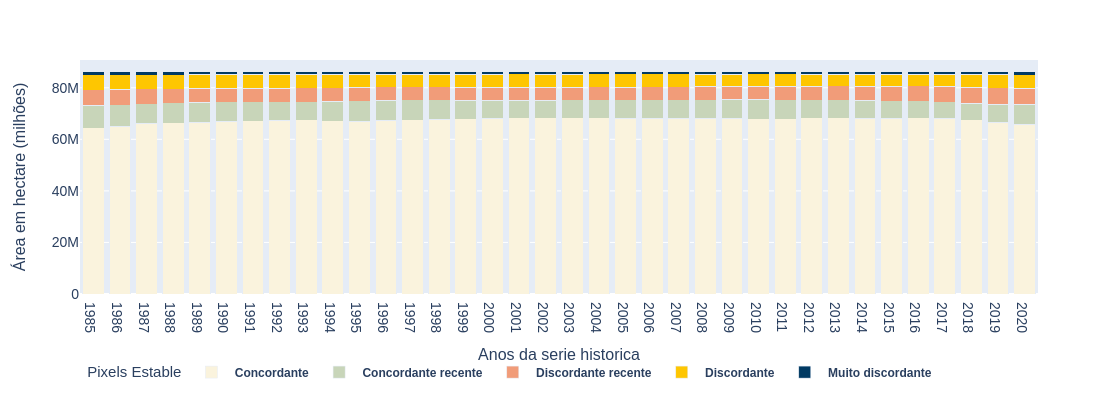

save as  Porcentagem_de_áreas_estaveis,_mapa_


In [67]:
nomeLegend = "Pixels Estable"
namePlot = "Porcentagem de áreas estaveis, mapa "
df_est['name_class'] = df_est['classe'].copy()
df_est['name_class'].replace(dict_name_Concorda, inplace=True)
plot_Serie_areasEstaveis(df_est, namePlot, dict_CColor_concord, nomeLegend)